In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Data Cleaning

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "survey.csv"  
df = pd.read_csv(file_path)

df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)


In [4]:
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [5]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [6]:
gender = df['Gender'].str.lower() #lower case all column's elements

gender = df['Gender'].unique() #Select unique elements

# Making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Removing invalid values
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [7]:
# Replace missing age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Ensure we are modifying the original DataFrame properly
df.loc[df['Age'] < 18, 'Age'] = df['Age'].median()
df.loc[df['Age'] > 120, 'Age'] = df['Age'].median()

# Define Age Ranges
df['age_range'] = pd.cut(
    df['Age'], bins=[0, 20, 30, 65, 100], 
    labels=["0-20", "21-30", "31-65", "66-100"], 
    include_lowest=True
)

In [8]:
#There are almost negilgable amount of entries of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

#Replace "NaN" string from defaultString

df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [9]:
df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


Exploratory Data Analysis (EDA)

A Series of questions to uncover patterns, trends, anomalies, relationships, and key insights without making any formal assumptions about the data

Q. Which Age group are more conscious about their mental health ?

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['treatment'].value_counts()

treatment
Yes    635
No     622
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

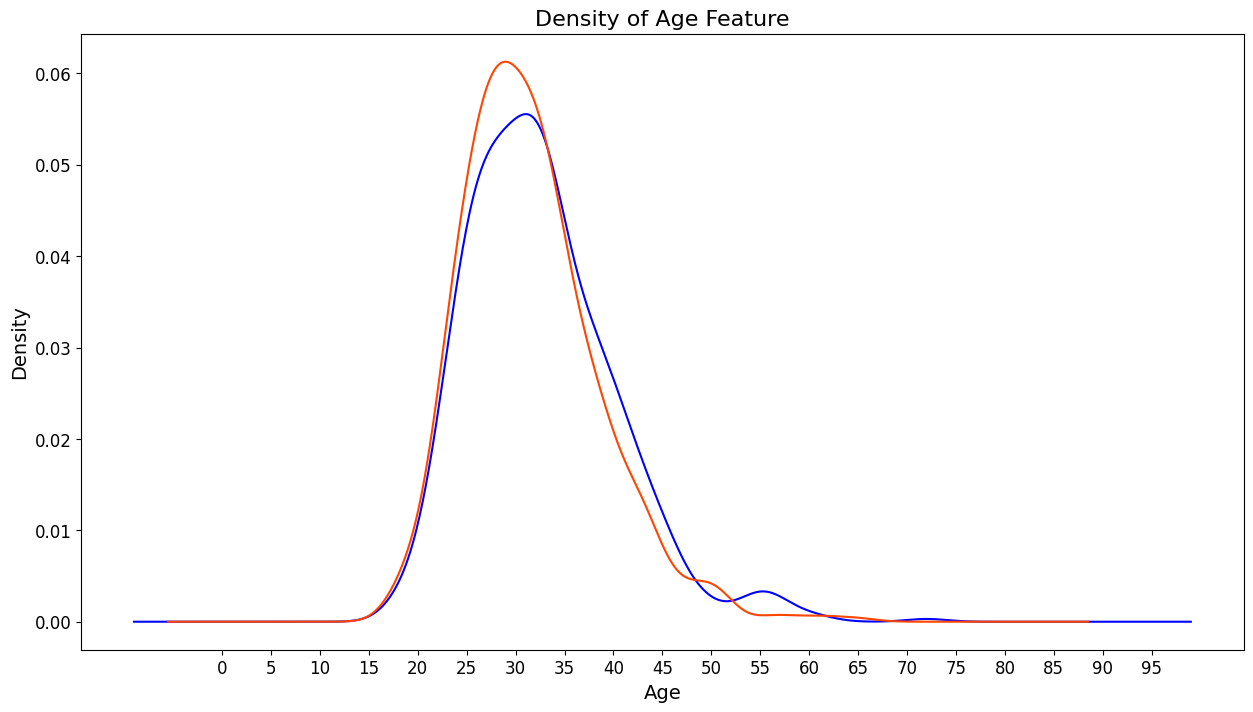

In [11]:
figure = plt.figure(figsize=[15, 8])

df[df['treatment'] == 'Yes']['Age'].plot.kde(color='blue')
df[df['treatment'] == 'No']['Age'].plot.kde(color='orangered')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

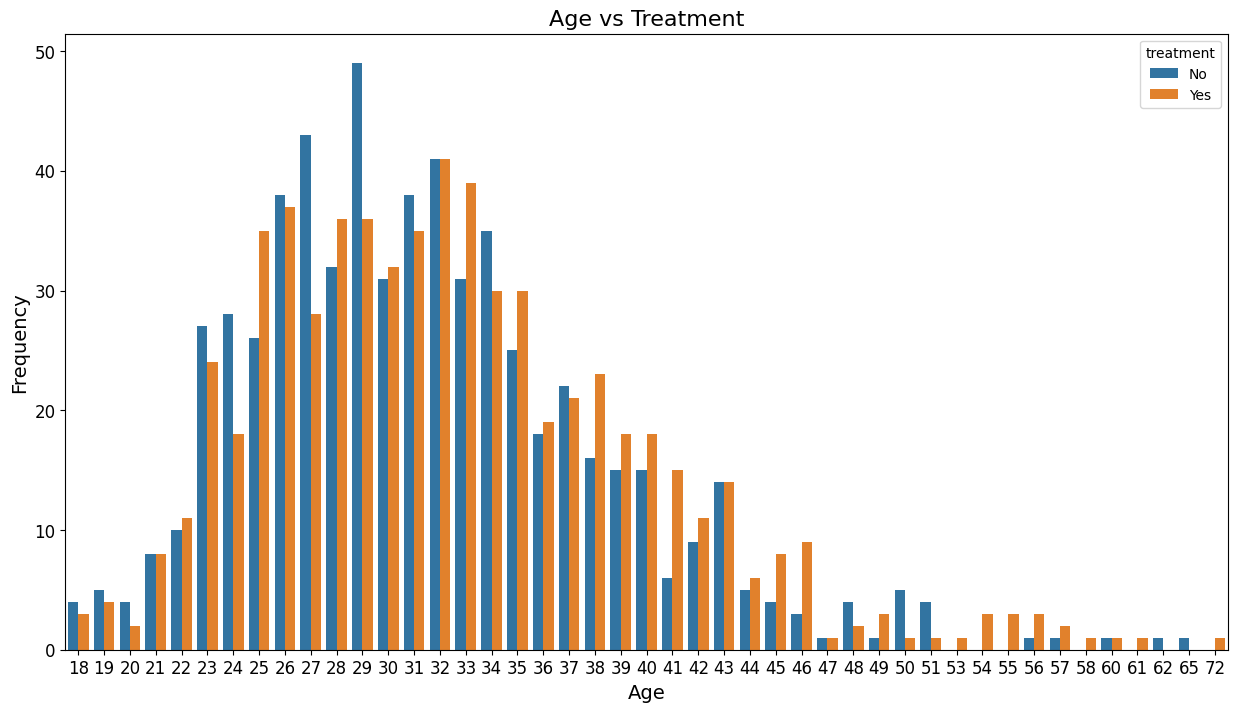

In [12]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=df)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

Analyzing the proportions, it suggests that individuals over the age of 30 are addressing their mental health concerns.

Q. What is the Density distribution Age field ?

<Figure size 1500x800 with 0 Axes>

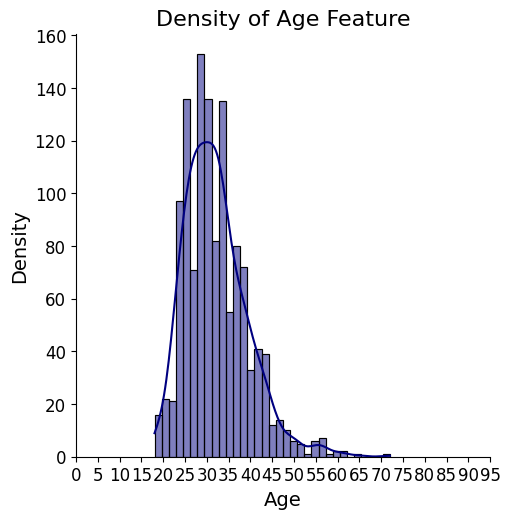

In [13]:
figure = plt.figure(figsize=[15, 8])

sns.displot(df['Age'], kde=True, color = 'navy')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

Observation:

The data shows a prominent peak occurring between the mid-20s to about mid-30s, indicating that the majority of individuals fall within this age range.

Q. What is the assosciation between Gender & Treatment ?



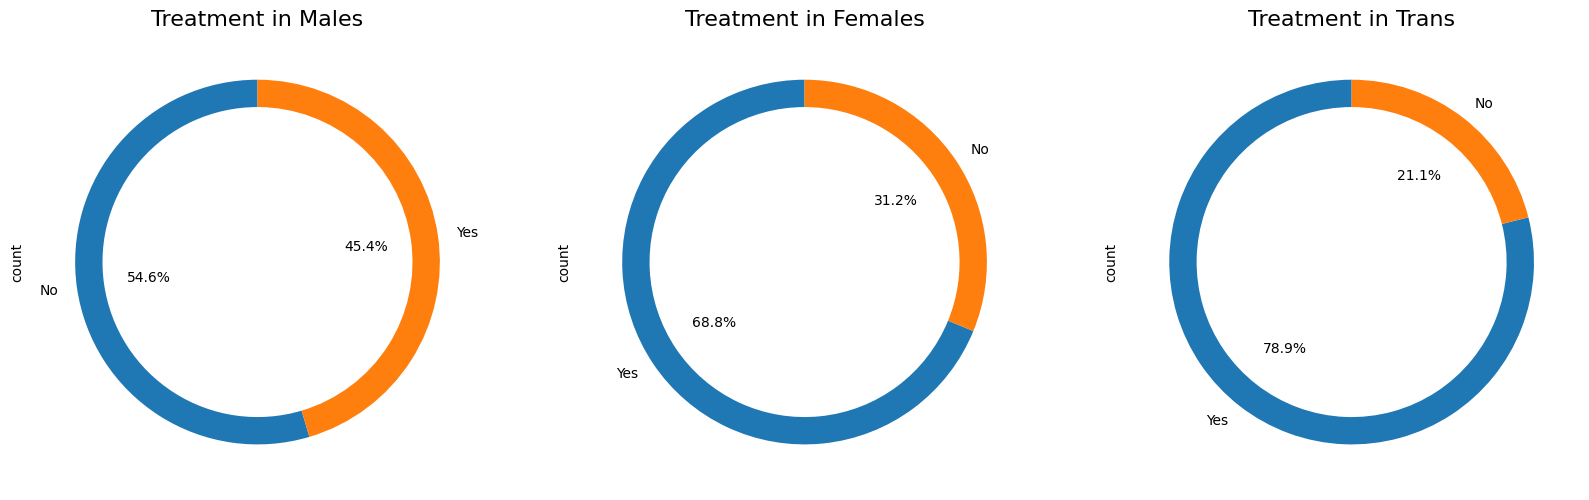

In [14]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['treatment'][df['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
df['treatment'][df['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
df['treatment'][df['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

In [15]:
df['treatment'].value_counts()


treatment
Yes    635
No     622
Name: count, dtype: int64

In [16]:
df['work_interfere'].value_counts()

work_interfere
Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         142
Name: count, dtype: int64

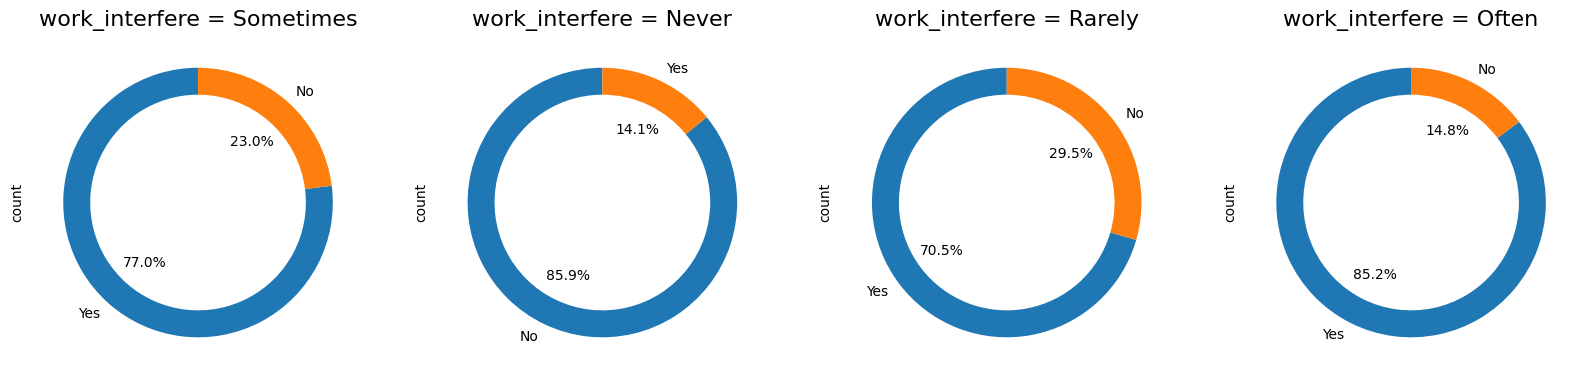

In [17]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
df['treatment'][df['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
df['treatment'][df['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
df['treatment'][df['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
df['treatment'][df['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()

We can observe that employees who are more 'Often' & 'Rarely' interfered during work are likely to have Mental health issues and hence are seeking Treatment.

Q. Do individuals show a greater willingness to seek treatment for mental health issues if there is a family history of such conditions?



In [18]:
df['family_history'].value_counts()


family_history
No     767
Yes    490
Name: count, dtype: int64

In [19]:
df.groupby(['treatment','family_history'])['family_history'].count()['No']


family_history
No     495
Yes    127
Name: family_history, dtype: int64

In [20]:
df.groupby(['treatment','family_history'])['family_history'].count()['Yes']


family_history
No     272
Yes    363
Name: family_history, dtype: int64

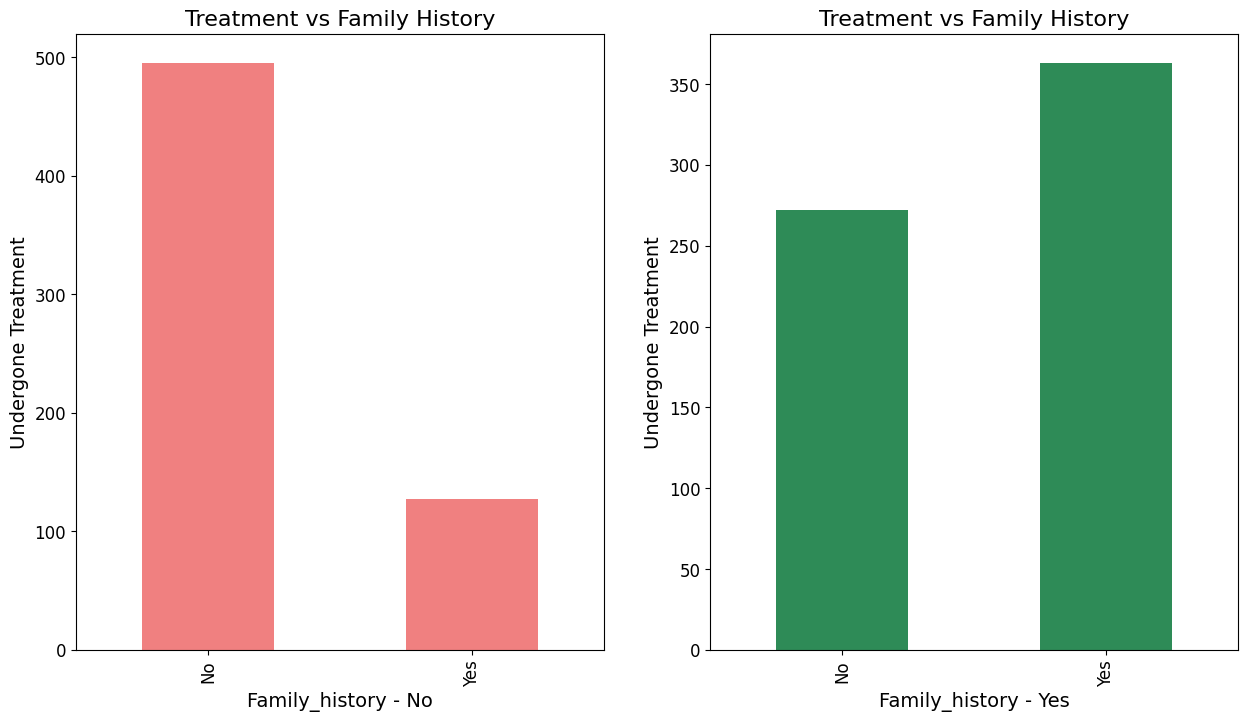

In [21]:
figure = plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
df.groupby(['treatment','family_history'])['family_history'].count()['No'].plot.bar(color='lightcoral')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - No', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)

plt.subplot(1,2,2)
df.groupby(['treatment','family_history'])['family_history'].count()['Yes'].plot.bar(color='seagreen')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - Yes', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)


plt.show()

We observe that employees with a family history of mental health issues are more inclined to choose treatment.
In contrast, employees without a family history of mental health issues may have lower awareness and, consequently, a reduced likelihood of seeking treatment.

In [22]:
df['treatment'].value_counts()


treatment
Yes    635
No     622
Name: count, dtype: int64

In [23]:
df['no_employees'].value_counts()


no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               160
500-1000           60
Name: count, dtype: int64

In [24]:
df[df['treatment'] == 'Yes']['no_employees'].value_counts()


no_employees
26-100            150
More than 1000    146
6-25              128
100-500            95
1-5                89
500-1000           27
Name: count, dtype: int64

In [25]:
df[df['treatment'] == 'No']['no_employees'].value_counts()


no_employees
6-25              162
26-100            139
More than 1000    136
100-500            81
1-5                71
500-1000           33
Name: count, dtype: int64

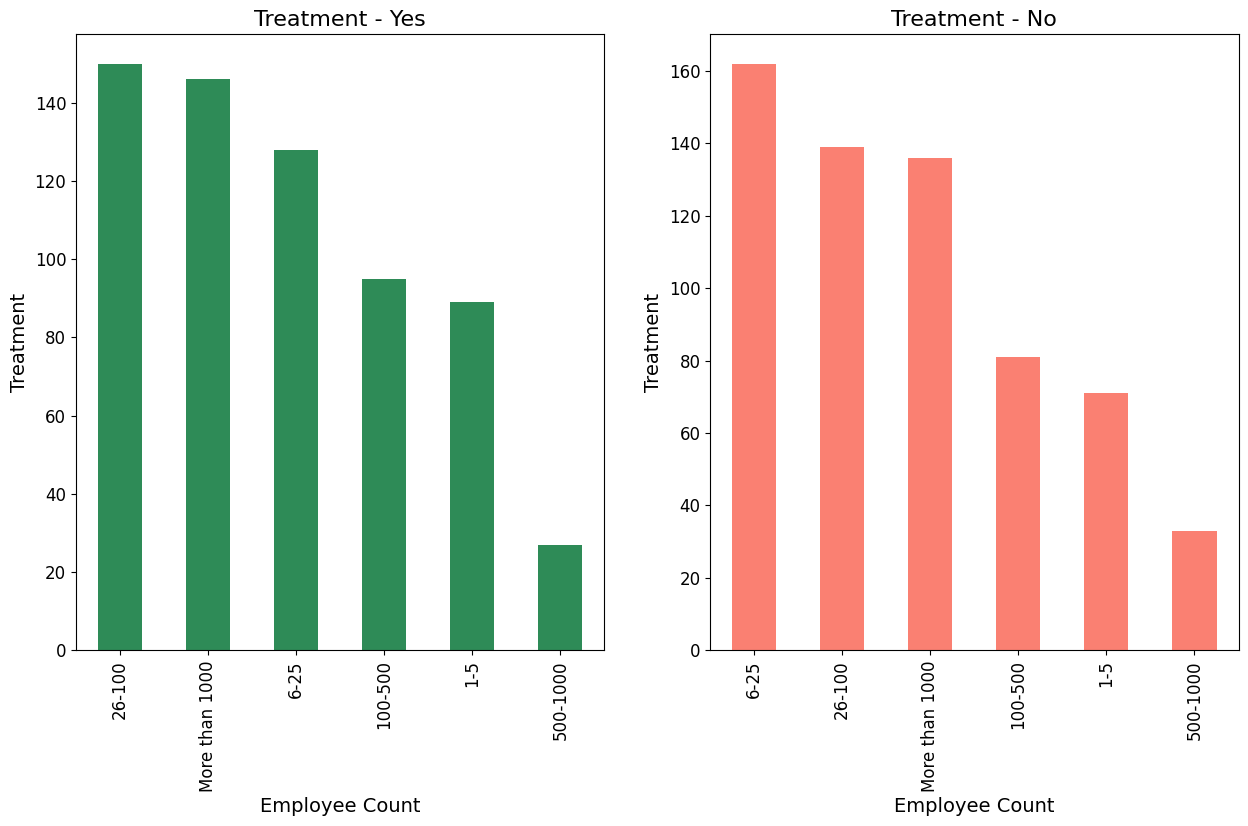

In [26]:
figure = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

df[df['treatment'] == 'Yes']['no_employees'].value_counts().plot.bar(color='seagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - Yes', size=16)


plt.subplot(1,2,2)

df[df['treatment'] == 'No']['no_employees'].value_counts().plot.bar(color='salmon')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - No', size=16)

plt.show()

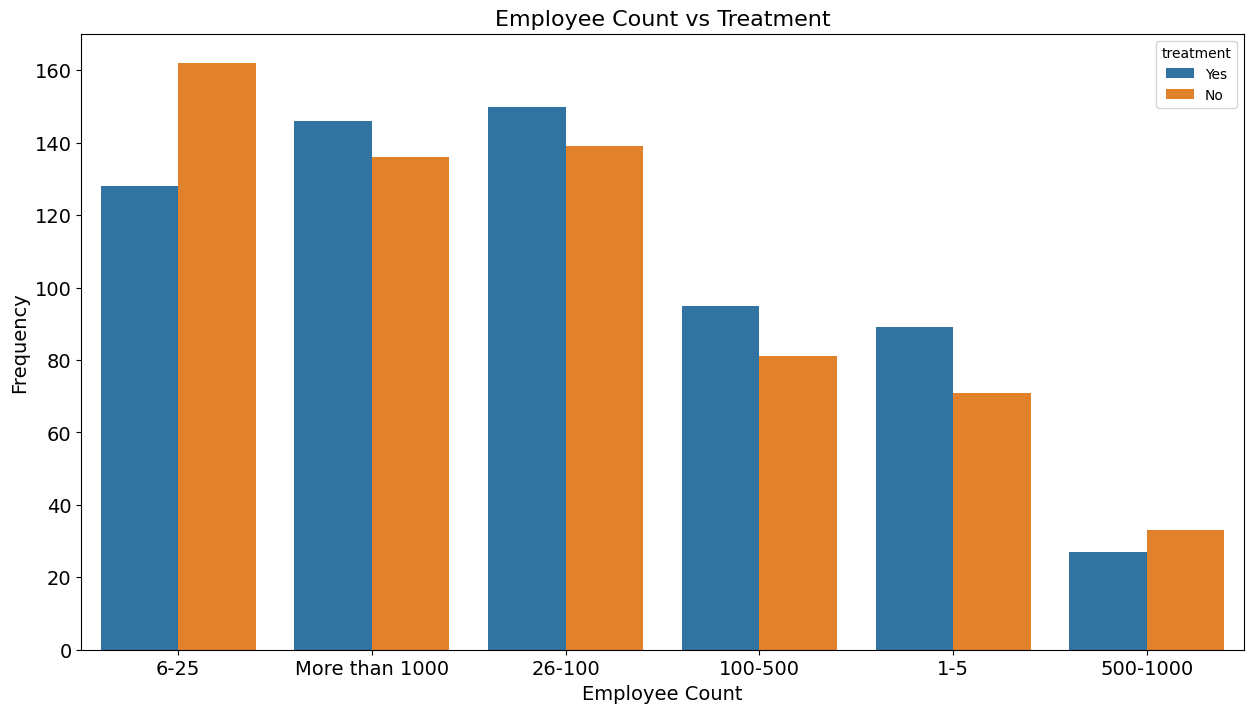

In [27]:
figure = plt.figure(figsize=[15, 8])

sns.countplot(x = 'no_employees', hue ='treatment', data=df)

plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel(xlabel ='Employee Count', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Employee Count vs Treatment', size=16)

plt.show()

Based on the data, it can be inferred that the highest number of employees who sought mental health treatment belong to companies sized between 26-100 employees.
Conversely, the largest number of employees who did not seek treatment come from companies sized between 6-25 employees.

Q. Top 10 Countries recorded for mental health treatment?



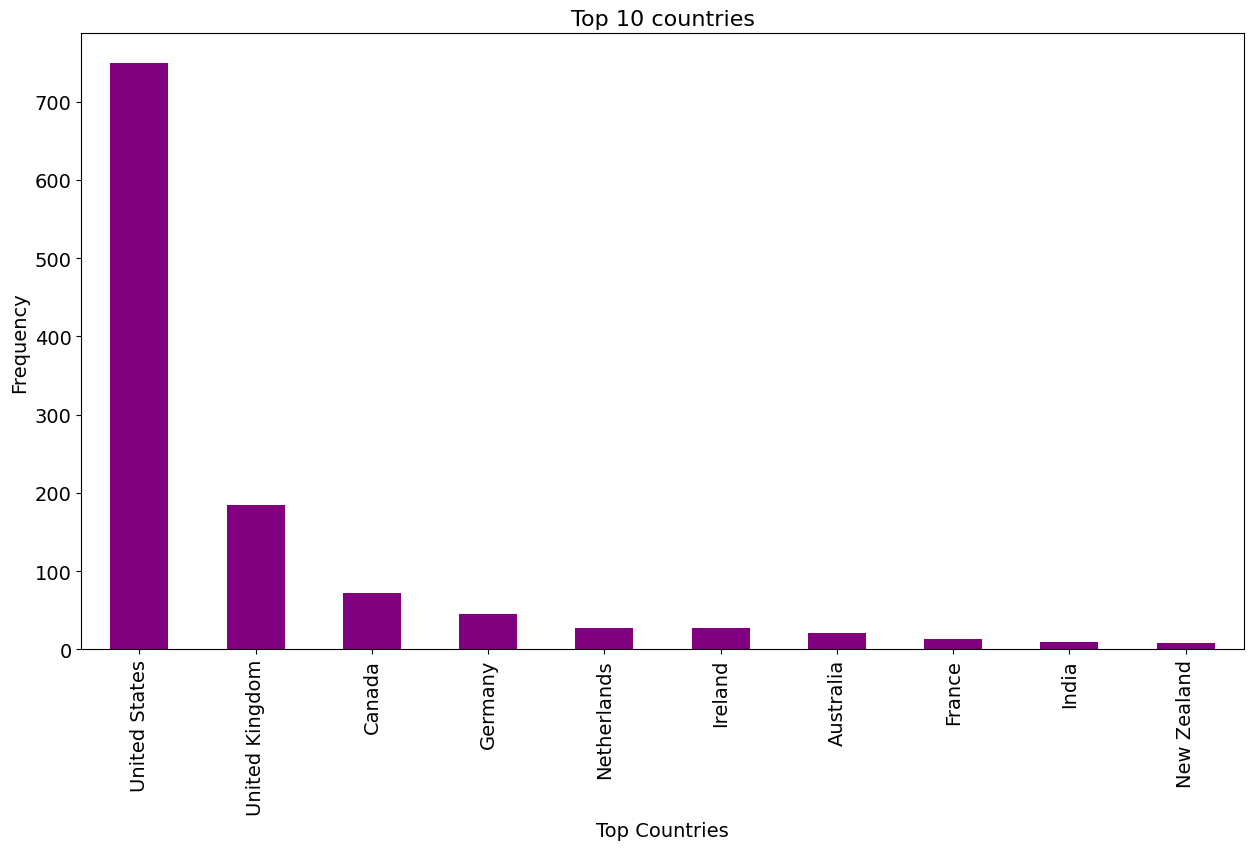

In [28]:
fig = plt.figure(figsize=[15,8])

df['Country'].value_counts().head(10).plot.bar(color='purple')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()

The majority of the records are from the United States, followed by the United Kingdom and Canada.


Q. Which countries are actually contributing more for mental health treatment?



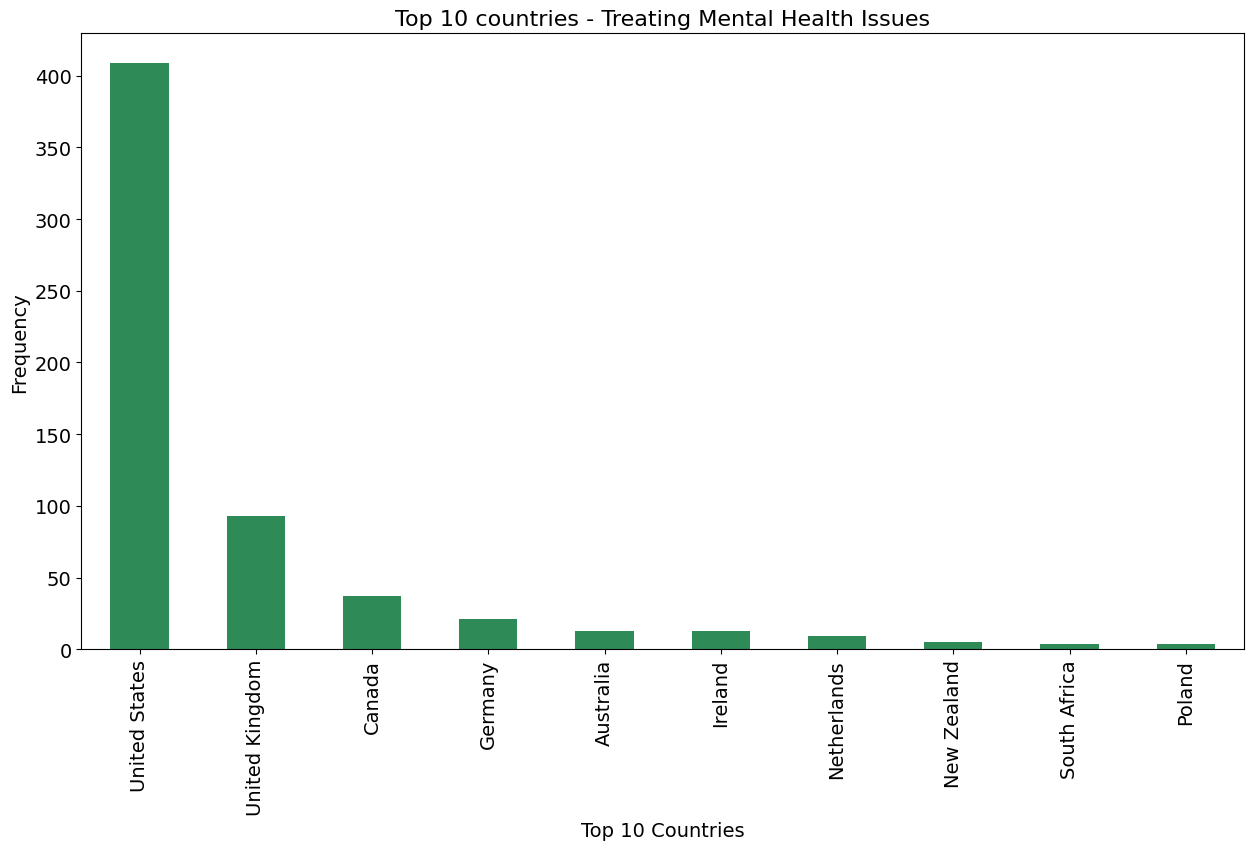

In [29]:
fig = plt.figure(figsize=[15,8])

df[df['treatment']== 'Yes']['Country'].value_counts().head(10).plot.bar(color='seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Treating Mental Health Issues', size=16)

plt.show()

We observe a shift in the lower section of the bar chart, indicating countries where a larger number of individuals are seeking treatment for their mental health.


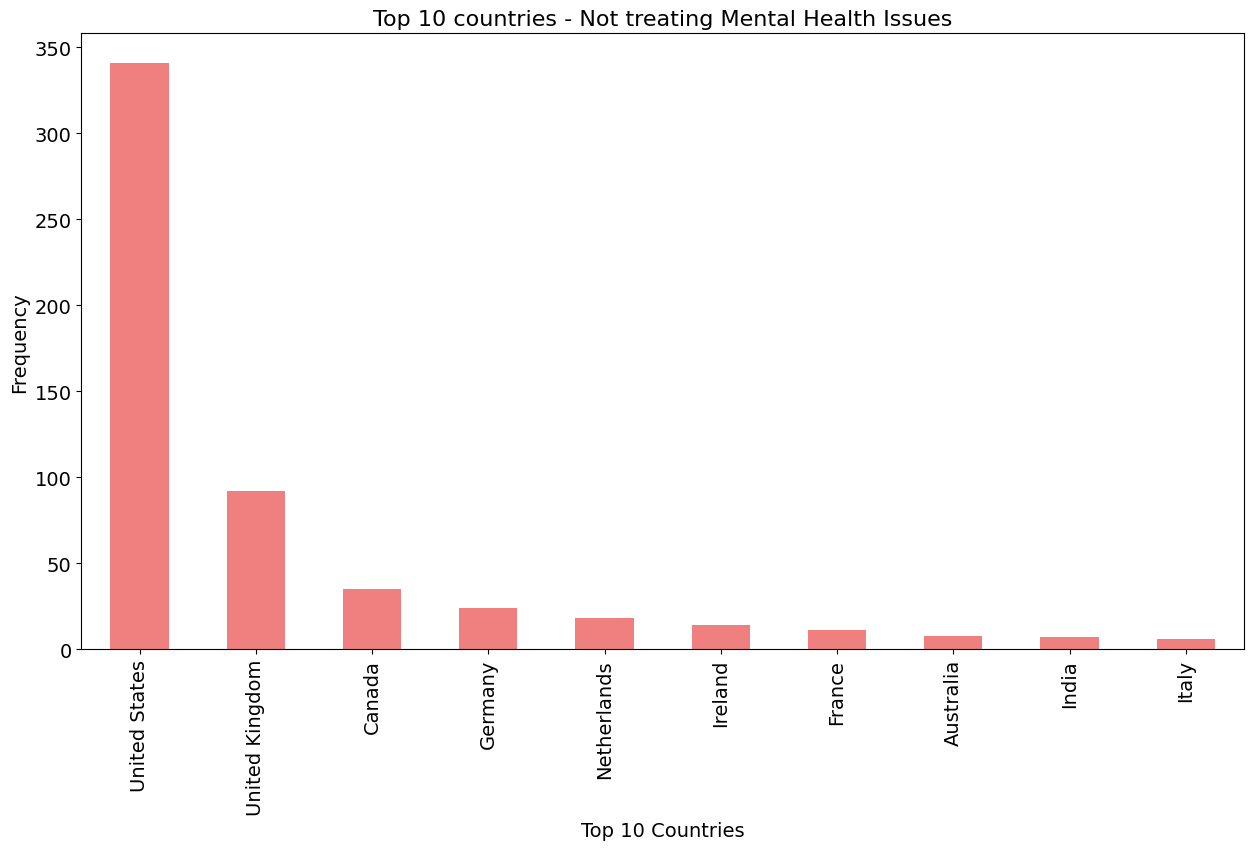

In [30]:
fig = plt.figure(figsize=[15,8])

df[df['treatment']== 'No']['Country'].value_counts().head(10).plot.bar(color='lightcoral')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Not treating Mental Health Issues', size=16)

plt.show()

Presented are the Top 10 countries where individuals are least inclined to seek treatment for their mental health concerns.

The data illustrates that the United States, United Kingdom, Canada, and Germany rank highest in both categories: 
treating a significant number of individuals with mental health issues and concurrently having the highest number of untreated mental health cases. This paradox within the statistics underscores the contradictory nature of our statement.

To resolve the aforementioned paradox, let's conduct a comprehensive analysis focusing on the data distribution, specifically examining countries that meet the condition where Treatment equals 'Yes' out of the total values recorded.

Let's calculate the ratio of observations from countries addressing mental health issues to the total number of countries included in the dataset.

In [31]:
df_yes = df[df['treatment']== 'Yes']['Country'].value_counts().head(10)
df_yes.sort_values(ascending=False)

Country
United States     409
United Kingdom     93
Canada             37
Germany            21
Australia          13
Ireland            13
Netherlands         9
New Zealand         5
South Africa        4
Poland              4
Name: count, dtype: int64

In [32]:
df['Country'].value_counts().head(10)


Country
United States     750
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64

In [33]:
list(df['Country'].value_counts()[:3].index)


['United States', 'United Kingdom', 'Canada']

In [34]:
df_top3 = df[df['Country'].isin(list(df['Country'].value_counts()[:3].index))]
df_top3.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


In [35]:
df_top3.shape

(1007, 25)

In [36]:
# Display the results

print('The number of people that exist from top 3 countries are: ', df_top3.shape[0])
print('Their proportion from total people surveyed is ', np.round(df_top3.shape[0]/df.shape[0], decimals=2))

The number of people that exist from top 3 countries are:  1007
Their proportion from total people surveyed is  0.8


Q. How many people did go for treatment based on gender for the top 3 countries?



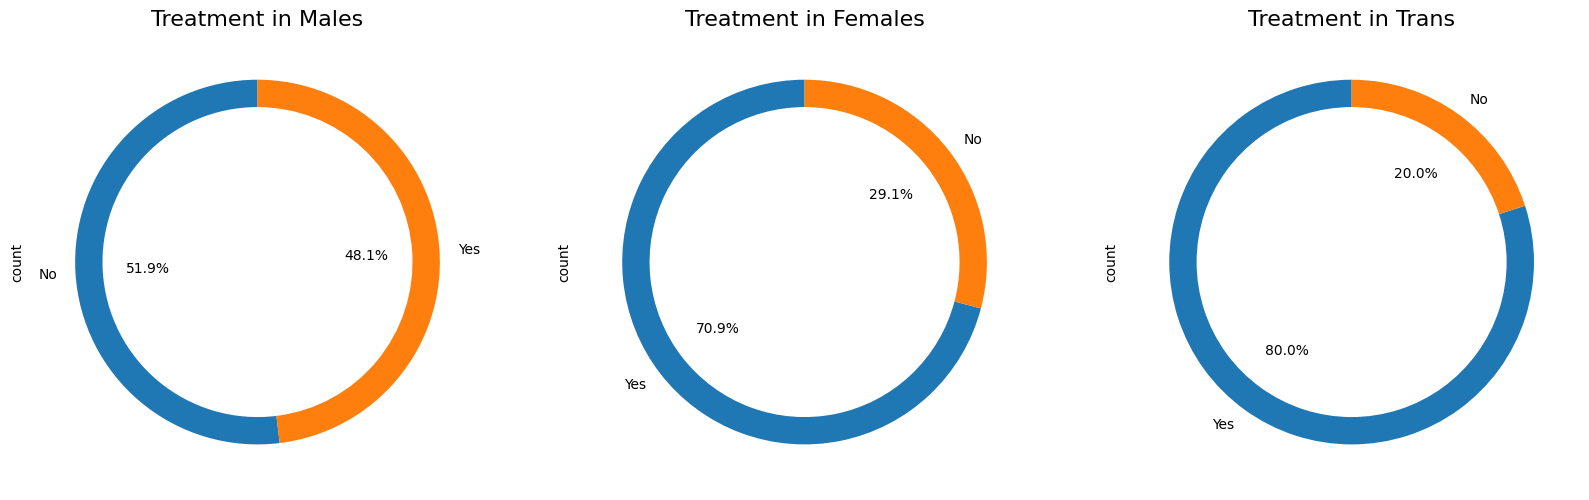

In [37]:
fig = plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
df_top3['treatment'][df_top3['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
df_top3['treatment'][df_top3['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
df_top3['treatment'][df_top3['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

48% of Males, 71% of Females and 80% of Trans, have gone through treatment among the top 3 countries.

In [38]:
df_top3['work_interfere'].value_counts()


work_interfere
Sometimes     389
Don't know    197
Never         173
Rarely        139
Often         109
Name: count, dtype: int64

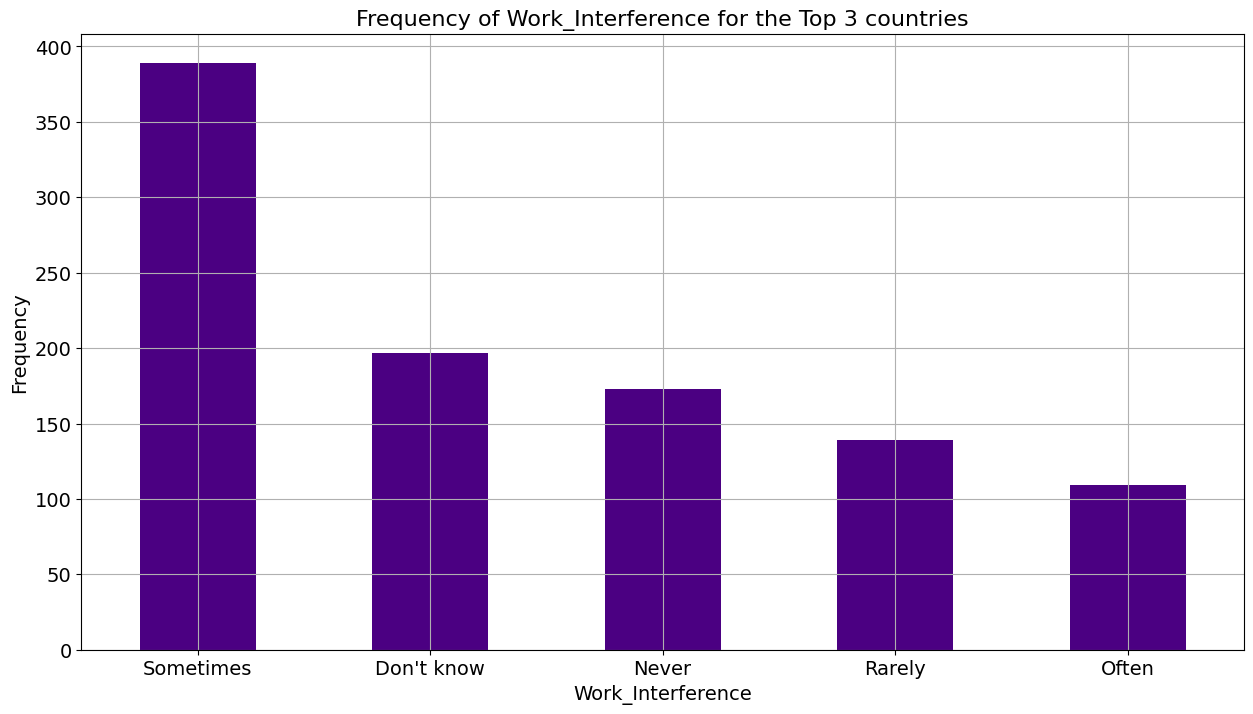

In [39]:
figure = plt.figure(figsize=(15,8))

df_top3['work_interfere'].value_counts().plot.bar(color='indigo')

plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel(xlabel= 'Work_Interference', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label= 'Frequency of Work_Interference for the Top 3 countries', size=16)
plt.grid(True)

plt.show()

The majority of individuals seeking treatment for their mental health issues experienced interference with their work at times.

Q. Relation between Treatment and Mental Health Consequence?



'mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?'

In [40]:
df['mental_health_consequence'].value_counts()


mental_health_consequence
No       490
Maybe    477
Yes      290
Name: count, dtype: int64

In [41]:
df[df['treatment']=='Yes']['mental_health_consequence'].value_counts()


mental_health_consequence
Maybe    253
No       210
Yes      172
Name: count, dtype: int64

In [42]:
df[df['treatment']=='No']['mental_health_consequence'].value_counts()


mental_health_consequence
No       280
Maybe    224
Yes      118
Name: count, dtype: int64

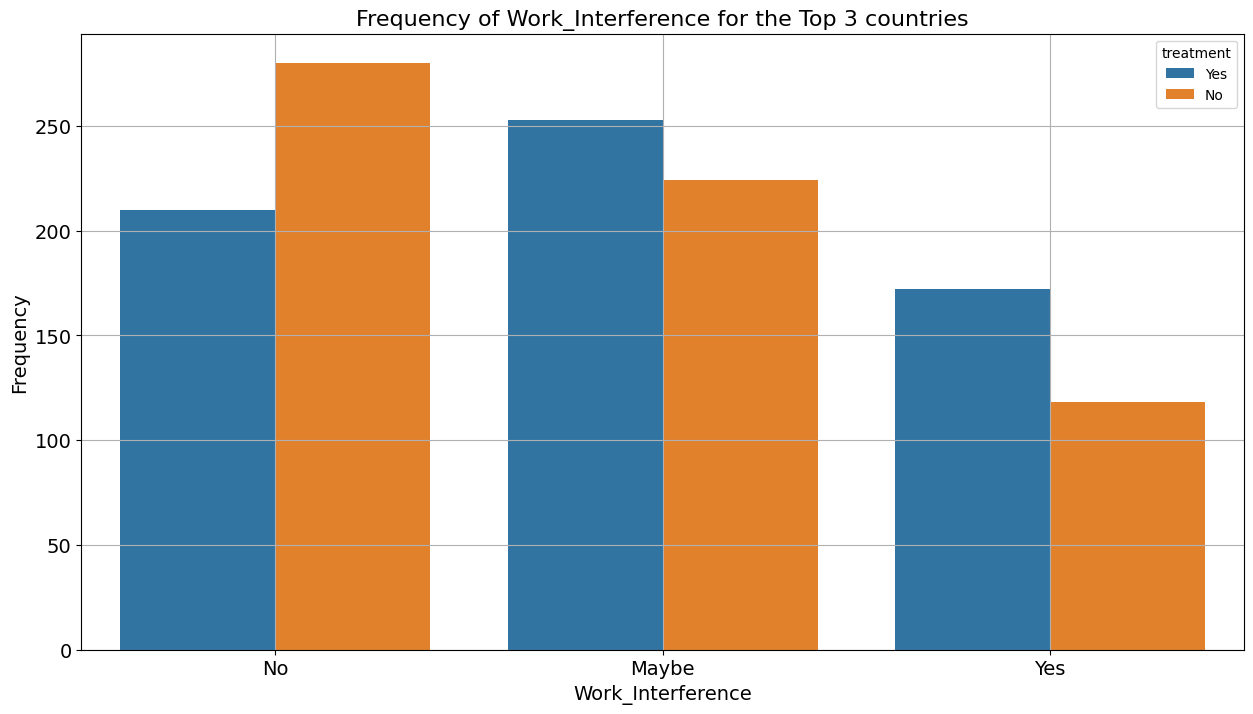

In [43]:
figure = plt.figure(figsize=(15,8))

sns.countplot(data=df, x='mental_health_consequence', hue='treatment')

plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel(xlabel= 'Work_Interference', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label= 'Frequency of Work_Interference for the Top 3 countries', size=16)
plt.grid(True)

plt.show()

Individuals who anticipate negative consequences when discussing their mental health issues with their employers show a higher willingness to seek treatment for their issues.

Similarly, Individuals who feel comfortable discussing their mental health issues with their employers tend to show a lower willingness to seek treatment for their concerns.

Q. What is the relationship between mental health consequences and the attitude?



In [44]:
def attitude(x):
  """A custom function to map values in a feature."""
  
  if x == 'No':
    return 'Positive'
  elif x == 'Yes':
    return 'Negative'
  elif x == 'Maybe':
    return 'Moderate'
  else:
    return x
  
df['attitudes'] = df['mental_health_consequence'].apply(attitude)
df['attitudes'].value_counts()

attitudes
Positive    490
Moderate    477
Negative    290
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Positive'), Text(0, 1, 'Moderate'), Text(0, 2, 'Negative')])

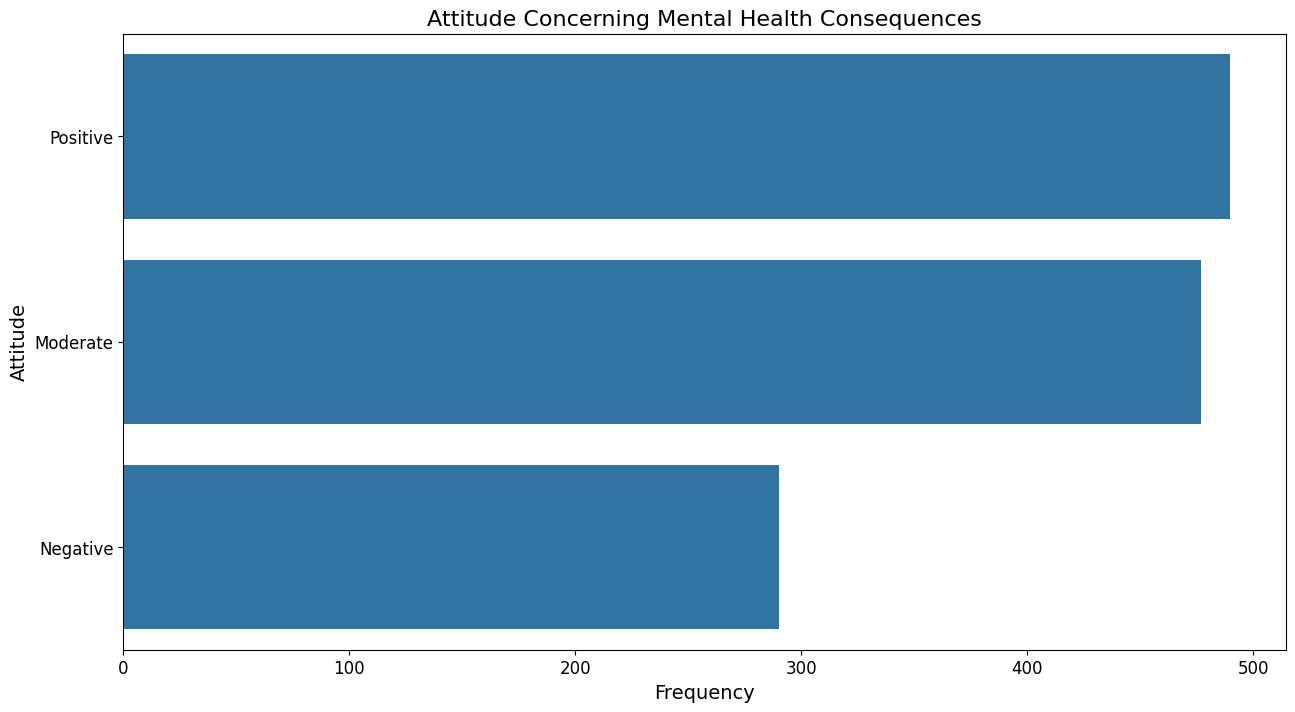

In [45]:
figure = plt.figure(figsize=[15, 8])

sns.countplot(y='attitudes', data=df)

plt.title(label='Attitude Concerning Mental Health Consequences', size=16)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Attitude', size=14)
plt.xticks(size=12)
plt.yticks(size=12)


The majority of individuals perceive their employers' attitudes to be more positive or moderately supportive rather than negative when addressing their mental health concerns.


Q. How does age relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

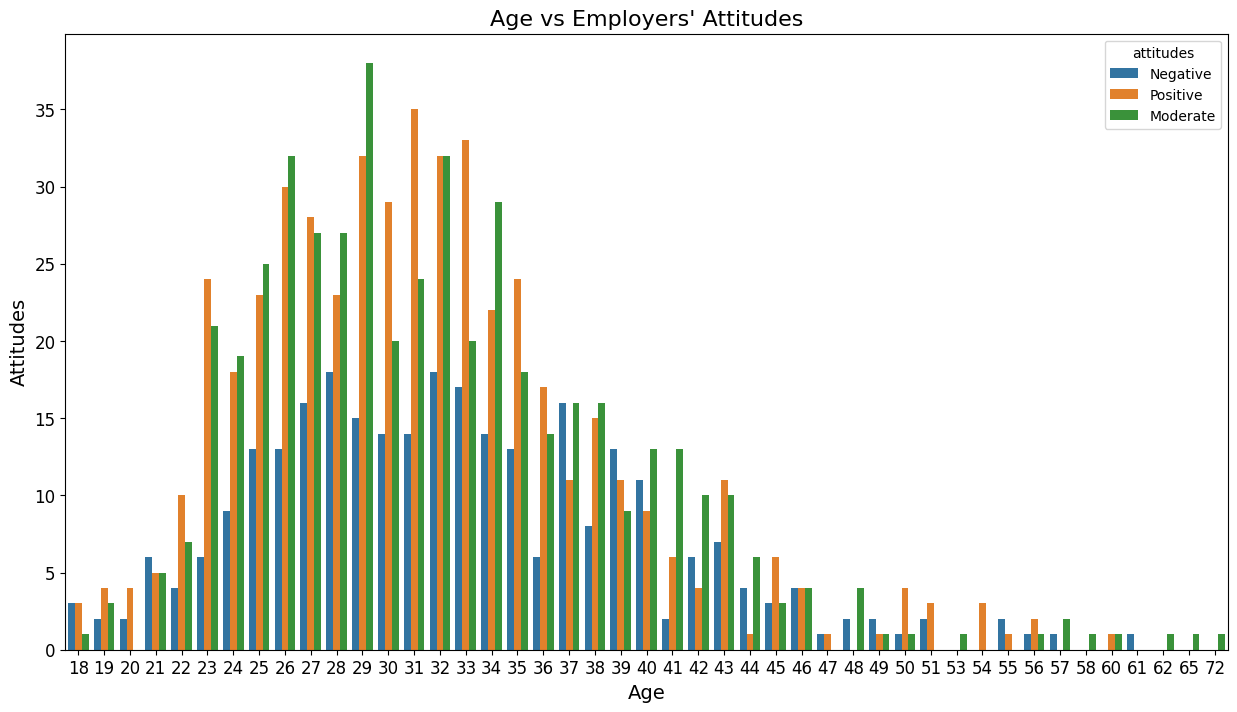

In [46]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='attitudes', data=df)

plt.title(label="Age vs Employers' Attitudes", size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Attitudes', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

This suggests that individuals in their mid-20s to mid-30s perceive their employers' attitude to be more positive or moderately supportive rather than negative when they discuss their mental health concerns.


Conclusion:

The mental health survey has helped us to understand the mental condition of employees working in tech firms across countries.

A total of 1259 entries were recorded during the survey out of which 1007 were recorded from the top 3 countries.

The United States leads the chart in terms of participation in the survey followed by the United Kingdom and Canada.

45% OF males, 69% of females, and 79% of trans were found to have sought treatment concerning the overall survey.

Likewise, data indicates that 48% of males, 71% of females, and 80% of trans individuals have received treatment within the top three countries in the recorded datase

The following set of parameters are found to be affecting mental health the most and thus requires treatment:

Age
Family history,
Work Interference,
Number of employees working in a company,
New Zealand and Australia lead in prioritizing the resolution of employees' mental health issues, encouraging a higher number of individuals to seek treatment, followed by the United States and Canada.

Actionable Insights:

There should be an awareness program about mental health and its effects.
Implementing an awareness program on mental health and its effects is crucial to encourage greater participation from males, considering their lower representation among the survey participants.

Relationship Managers should provide supportive guidance to their employees.

Managers and Employers need to maintain unbiased attitudes toward both the work and the employees, offering appropriate measures and support for those experiencing mental health challenges.

Regular appreciation at work is beneficial for employee well-being.

Encoding the dataset

In [47]:
from sklearn import preprocessing
labelDictionary = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDictionary[labelKey] =labelValue
    
for key, value in labelDictionary.items():     
    print(key, value)

#Remove 'Country' attribute
df = df.drop(['Country'], axis= 1)
df.head()

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Mo

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,attitudes
0,19,0,0,0,1,2,4,0,1,2,...,1,1,1,2,1,0,2,0,2,2
1,26,1,0,0,0,3,5,0,0,0,...,0,1,0,0,1,1,0,0,2,0
2,14,1,0,0,0,3,4,0,1,1,...,1,1,2,2,2,2,1,0,2,2
3,13,1,0,1,1,2,2,0,1,1,...,2,2,1,0,0,0,1,1,2,1
4,13,1,0,0,0,1,1,1,1,2,...,1,1,1,2,2,2,0,0,2,2


The cell above, the code is implementing a encoding system. Encoding is done when the data of an attribute in the dataset is categorical. As categorical data is a string, the string values are converted into a scale of numbers.For example a "Yes" would become 1 and a "No" would become a 0. Thus by making it numerical it makes it easier to compute in any type of model

In [48]:
df


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,attitudes
0,19,0,0,0,1,2,4,0,1,2,...,1,1,1,2,1,0,2,0,2,2
1,26,1,0,0,0,3,5,0,0,0,...,0,1,0,0,1,1,0,0,2,0
2,14,1,0,0,0,3,4,0,1,1,...,1,1,2,2,2,2,1,0,2,2
3,13,1,0,1,1,2,2,0,1,1,...,2,2,1,0,0,0,1,1,2,1
4,13,1,0,0,0,1,1,1,1,2,...,1,1,1,2,2,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,1,1,1,1,1,1,0,0,1,2
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,1,2,1,1,2,0,2,2
1256,16,1,0,1,1,4,5,0,1,2,...,2,2,0,0,1,1,1,0,2,1
1257,28,0,0,0,0,0,1,1,1,1,...,2,1,0,0,1,1,1,0,2,1


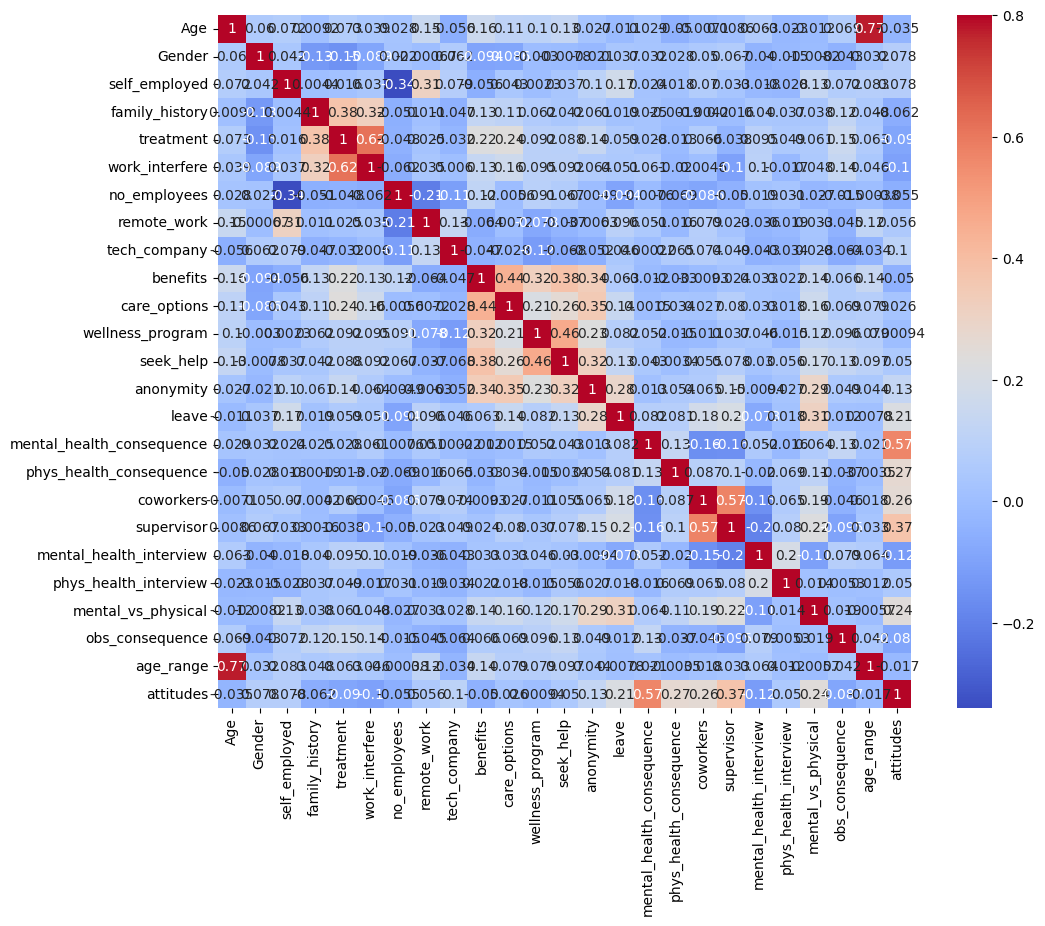

In [50]:
# Compute the correlation matrix
corrmat = df.corr()

# Correct the argument name (use figsize instead of figheight)
f, ax = plt.subplots(figsize=(12, 9))

# Create a heatmap
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

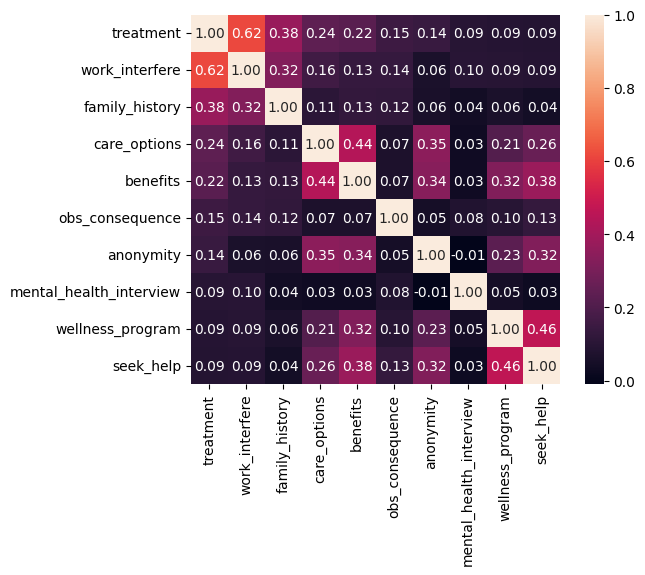

In [51]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.barplot(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

A correlation matrix is a matrix where each attribute is compared with each attribute to find if there is any correlation between them. In the matrix form, it is easy to see which attribute has higher correlation with which

c:\Users\mohammad mujahiddin\Downloads\Project\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\mohammad mujahiddin\Downloads\Project\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Highly Correlated Features Removed: []
Top Features (Chi-Square): ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
Top Features (Mutual Information): ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
Top Features (Random Forest Importance): ['work_interfere', 'Age', 'family_history', 'leave', 'care_options', 'benefits', 'Gender', 'anonymity']


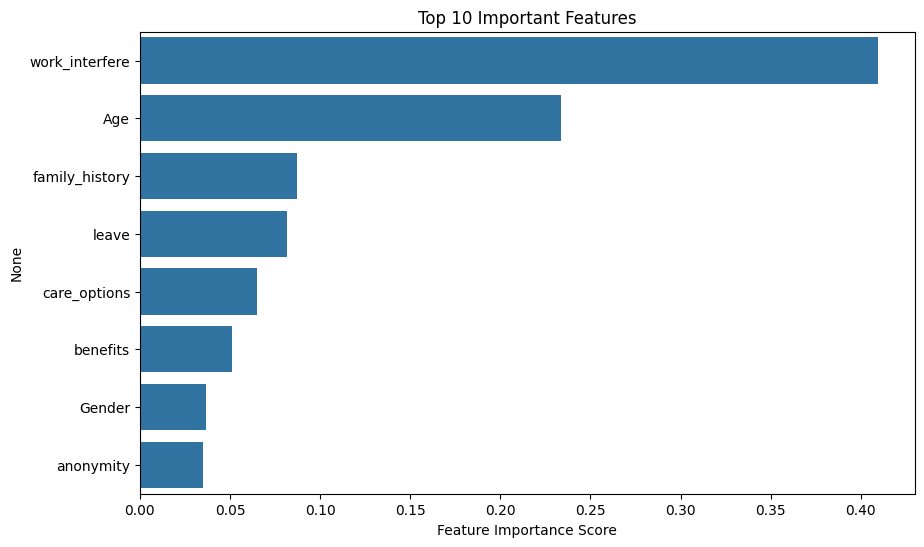

In [56]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df['treatment']  # Ensure y is correctly selected

# Convert categorical features to numerical (if necessary)
X = pd.get_dummies(X, drop_first=True)

### 1. Correlation Matrix (Remove highly correlated features) ###
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.85)]
X.drop(columns=highly_correlated, inplace=True)

### 2. Chi-Square Test (For Categorical Data) ###
chi_selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_chi_selected = chi_selector.fit_transform(X, y)
chi_support = chi_selector.get_support()
chi_features = X.columns[chi_support]

### 3. Mutual Information (For Nonlinear Relationships) ###
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_mi_selected = mi_selector.fit_transform(X, y)
mi_support = mi_selector.get_support()
mi_features = X.columns[mi_support]

### 4. Feature Importance using Random Forest ###
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10).index  # Select top 10 features

### Print Selected Features ###
print("Highly Correlated Features Removed:", highly_correlated)
print("Top Features (Chi-Square):", list(chi_features))
print("Top Features (Mutual Information):", list(mi_features))
print("Top Features (Random Forest Importance):", list(top_features))

### Visualizing Feature Importance ###
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.nlargest(10), y=feature_importance.nlargest(10).index)
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", list(selected_features))


Selected Features by RFE: ['Age', 'family_history', 'care_options', 'leave', 'work_interfere']


In [49]:
df.to_csv("data_preprocessed.csv", index=False)
